# <p style="text-align:center"> <span style="color:blue">[WMCS011-05] Pattern Recognition (for CS) 2022-2023 </span></p>

## <p style="text-align:center"> 1st practical: Iris recognition \& Image matching using SIFT</p>

### $$ \text{Group 7} $$
### $$ \text{Tom Eijkelenkamp (S1889338)}  \quad \& \quad \text{Ilse Harmers  (S4016335)} $$

## **Information and instructions**
*   <span style="color:red">**DEADLINE**</span>  Tuesday 6 December 2022 **before** 23:59PM. Hand in this file *containing your code and answers added* through Brightspace.
*   This is a group assignment (should be done in pairs). 
*  Insert a Markdown cell (where needed) and add the formulas you used to answer a question, as well as a short description of how you came up with your solution.
*   Some exercises ask you to find a specific value or expression or ask you for an interpretation. Insert a Markdown cell and provide your answers briefly.
* Make sure to include all the necessary print statements and remove the extra ones that were only used for testing your implementation. 
*   Please ensure that all your figures are properly labeled with title, axis labels, and legend if you plot multiple curves in one graph.
*   Structure your code using comments and separate code cells where necessary, and be sure to indicate which part of your code belongs to which question.
*   To test your code, we will run all your code cells from scratch - so make sure all results can be reproduced!
* For any questions, you can contact us at [pr2022rug@gmail.com](pr2022rug@gmail.com).

## Table of Contents
* [Exercise 1 - Person authentication by binary iris pattern (50pt)](#chapter1)
    * [Part 1 - Distribution of authentics and imposters](#section_1_1)
    * [Part 2 - Person authentication](#section_1_2)
* [Exercise 2 - Image matching using SIFT (50 pt)](#chapter2)
* [Contributions](#chapter3)

In [1]:
# Import libraries

import numpy as np
from scipy.io import loadmat   # for loading in MATLAB data files 
import matplotlib.pyplot as plt   # for plotting figures
from scipy.stats import norm   # used in Part 2 of Exercise 1
import cv2 as cv   # used in Exercise 2

# <span style="color:blue">Exercise 1 - Person authentication by binary iris pattern (50pt)  <a class="anchor" id="chapter1"></a></span>


On Brightspace, you will find the file **lab1-data_Irisrecognition.zip**, which contains the iris codes of different persons. The file named $\textit{person01.mat}$ to $ \textit{person20.mat}$ contains a two-dimensional binary array of 20 rows, in which each row is a 30-dimensional binary iris code extracted from an iris image of a person. If you take a closer look at the rows of one such array, you will notice that two rows can differ in only a few positions (bits); If you compare two rows that come from two different files $person[i]$ and $ person[j]$, you will notice that two such iris codes differ in about 15 positions.

## Part 1 - Distribution of authentics and imposters (20pt) <a class="anchor" id="section_1_1"></a></span>


Compute two sets S and D of 10000 normalized Hamming Distance (HD) as follows:

<ol>
<li> <b> For set S: </b> Choose randomly one person and randomly two iris codes (rows) from that person. Compute the normalized HD of the iris codes from these two rows. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>
<br>

<li> <b>For set D: </b> Choose randomly two different persons and randomly one row from each of these two persons. Compute the normalized HD of these two iris codes from these two different persons. Repeat this process 10000 times to obtain 10000 such normalized HD values. </li>

</ol>

<span style="color:blue"> **(10 pt) (A)** </span> **Plot the histograms of Set S and D in one figure with different colors. Make sure to use bins of the same size for the two histograms and to use an appropriate number of bins.**

<hr>

We need to plot the histograms of Set S and D following the instructions given above. After loading in the MATLAB data files containing the iris codes for 20 persons, Set S and D were computed using while loops which repeat the above described processes 10,000 times to obtain 10,000 normalized Hamming Distance (HD) values. These HD values corresponding to Set S and D were then plotted as histograms in one figure. 

In [2]:
# Compute Set S...

np.random.seed(42)   # fixing the random seed s.t. our results can be reproduced

# This for loop appends the data stored in the MATLAB files to an empty list by looping over the file names.
data = []
for i in range(1, 20+1):
    annots = loadmat('./lab1-data_Irisrecognition/person{}.mat'.format(i))
    data_person = annots['iriscode'].astype(np.int16)
    data.append(data_person)

length_iriscode = 30   # length of the iris codes

# This while loop chooses randomly one person & randomly two iris codes (rows) 
# from that person and computes the normalized Hamming distance (HD) of the iris codes from these two rows.
# This process is repeated for 10,000 iterations.

S = []   # for storing the normalized HD values; Set S
t = 0   # initializing 't' for the while loop
end = 10**4   # while loop ends after 10,000 iterations

while t < end:
    choice_person = np.random.randint(0, 20)   # choosing a random person
    choice_row1 = np.random.randint(0, 20)   # choosing random row 1 / iris code 1
    choice_row2= np.random.randint(0, 20)   # choosing random row 2 / iris code 2
    
    HD = np.sum(abs(data[choice_person][choice_row1] - data[choice_person][choice_row2]))   # Hamming distance
    HD_norm = HD/length_iriscode   # normalized Hamming distance
    
    S.append(HD_norm)
    
    t += 1
    

In [3]:
# Compute set D...

# This while loop chooses randomly two persons & randomly two iris codes (rows) from those persons 
# and computes the normalized HD of the iris codes from these two rows. This process is repeated for 10,000 iterations.

D = []   # for storing the normalized HD values; Set D
t = 0   # initializing 't' for the while loop

while t < end:
    choice_person1 = np.random.randint(0, 20)   # randomly choosing person 1
    choice_row1 = np.random.randint(0, 20)   # randomly choosing a row/iris code from person 1
    # Note that the same person 1 should not be picked when randomly choosing person 2, so there is one less option to consider.
    choice_person2 = np.random.choice([i for i in range(0, 20) if i != choice_person1])   # randomly choosing person 2
    choice_row2= np.random.randint(0, 20)   # randomly choosing a row/iris code from person 2
    
    HD = np.sum(abs(data[choice_person1][choice_row1] - data[choice_person2][choice_row2]))   # Hamming distance
    HD_norm = HD/length_iriscode   # normalized Hamming distance
    
    D.append(HD_norm)
    
    t += 1


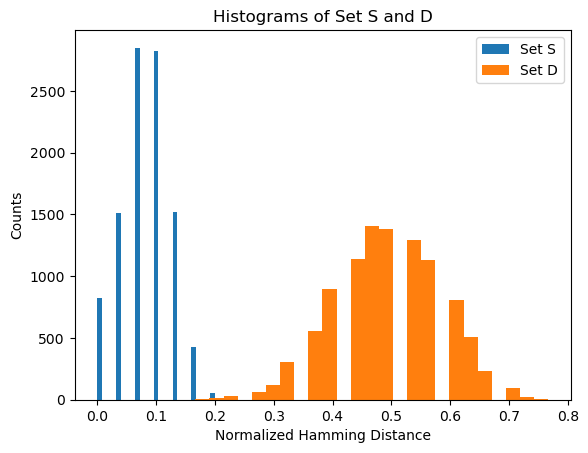

In [4]:
# Plot histograms of Set S and D...

fig_b = plt.figure()
frame_b = fig_b.add_subplot(1, 1, 1)   # adding subplot
frame_b.hist(S, bins = 25, label="Set S")   # plotting Set S
frame_b.hist(D, bins = 25, label="Set D")   # plotting Set D

frame_b.set_xlabel('Normalized Hamming Distance')   # setting x label
frame_b.set_ylabel('Counts')   # setting y label
frame_b.set_title('Histograms of Set S and D')   # setting title
frame_b.legend()   # adding legend

plt.show()

<span style="color:blue">  **(5 pt) (B)** </span> **Compute the mean and the variance of the set S and D and specify their values.**

<hr>

We need to compute the mean and variance of Set S and D. For this, we have used the NumPy functions $mean$ and $variance$. Hence, the mean and variance of Set S were found to be $\mu \approx 0.081$ and $\sigma^2 \approx 0.0018$. For Set D, we have $\mu \approx 0.49$ and $\sigma^2 \approx 0.0081$. We can observe that means of the sets are relatively far apart when considering their absolute distance.  

In [5]:
# Compute mean and variance...

S_mean = np.mean(S)
S_var = np.var(S)

print("Mean of Set S: {:.3f} \nVariance of Set S: {:.4f}".format(S_mean, S_var))

print()

D_mean = np.mean(D)
D_var = np.var(D)

print("Mean of Set D: {:.3f} \nVariance of Set D: {:.4f}".format(D_mean, D_var))

Mean of Set S: 0.081 
Variance of Set S: 0.0018

Mean of Set D: 0.494 
Variance of Set D: 0.0081


<span style="color:blue">  **(5 pt) (C)** </span> **Draw the normal distributions (Gaussian functions), that correspond to the means and variances calculated above, to the histograms of Set S and D. Find an appropriate way to scale the normal distribution curves so that they fit well the histograms.**

<hr>

We need to draw the Gaussian functions, that correspond to the means and variances calculated in Question (B), to the histograms of Set S and D. For this, we have used the definition of the Gaussian function from Lecture 2 of this course,

$$\mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} .$$

The normal distribution curves were scaled with the ratio of the maximum value in the histogram divided by the maximum value in the Gaussian function for each set, i.e.,

$$ratio = \frac{max(\text{counts in bins})}{max(\mathcal{N}(\mu, \sigma^2))}.$$

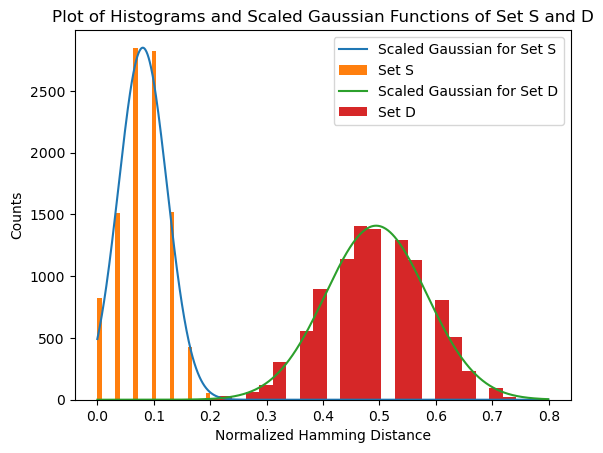

In [6]:
# Plot the distributions...

# Definition of the Gaussian function, as given on slide 19 in Lecture 2.
def gaussian(x, mu, var):
    return (1/(2*np.pi*var)**0.5)*np.e**(-((x-mu)**2)/(2*var))

x = np.arange(0, 0.8, 0.001)   # setting up a range of normalized Hamming distances for the Gaussian functions

S_gaussian = gaussian(x, S_mean, S_var)   # Gaussian for Set S
hS, bS = np.histogram(S, bins=25)   # returns the counts and bin edges of the histogram for Set S
ratio_S = np.max(hS)/np.max(S_gaussian)   # scaling factor for the normal distribution s.t. histogram is fitted well

D_gaussian = gaussian(x, D_mean, D_var)   # Gaussian for Set D
hD, bD = np.histogram(D, bins=25)   # returns the counts and bin edges of the histogram for Set S
ratio_D = np.max(hD)/np.max(D_gaussian)   # scaling factor for the normal distribution s.t. histogram is fitted well

# Plotting the (scaled) normal distributions to the histograms of Set S and D.

fig_c = plt.figure()
frame_c = fig_c.add_subplot(1, 1, 1)

frame_c.plot(x, ratio_S*S_gaussian, label="Scaled Gaussian for Set S")
frame_c.hist(S, bins = 25, label="Set S")

frame_c.plot(x, ratio_D*D_gaussian, label="Scaled Gaussian for Set D")
frame_c.hist(D, bins = 25, label="Set D")

frame_c.set_xlabel('Normalized Hamming Distance')
frame_c.set_ylabel('Counts')
frame_c.set_title('Plot of Histograms and Scaled Gaussian Functions of Set S and D')
frame_c.legend()

plt.show()

## Part 2 - Person authentication (30pt) <a class="anchor" id="section_1_2"></a></span>


The distribution associated with the set S is the class-conditional probability density function that we measure a given HD value for two iris codes of the same person. The distribution associated with the set D is the class-conditional probability density function that we measure a given HD value for two iris codes of two different persons.

Our Null-hypothesis $\textit{H0}$ is that two iris patterns are different. We choose a value
for the decision criterion $\textit{d}$ and compare the HD of two iris patterns to d. If $ \textit{HD > d}$, we consider this as confirmation of our assumption that the two iris codes are different; If $\textit{HD < d}$, we consider our assumption that the two iris codes are different is not confirmed, i.e., implicitly we accept that they come from the same person.

<span style="color:blue">  **(5 pt) (A)** </span> **Estimate the value of the decision criterion d for which the probability of accepting an imposter is 0.0005. This situation will occur when the HD between the iris codes of two different persons is smaller than the decision criterion d. You can use the python function $scipy.stats.norm.ppf$ to find such decision criterion.**

<hr>

We need to estimate the value of the decision criterion $d$ for which the probability of accepting an imposter is 0.0005. As described during Lecture 2, we are computing the normalized Hamming distance where the integral in the tail of the 'Imposters' distribution is equal to 0.0005. For this, we can use the Python function $scipy.stats.norm.ppf$ with the mean and standard deviation of the Gaussian function for Set D. Hence, the value of the decision criterion is given by $d \approx 0.20$. 

Estimated value of the decision criterion 0.199


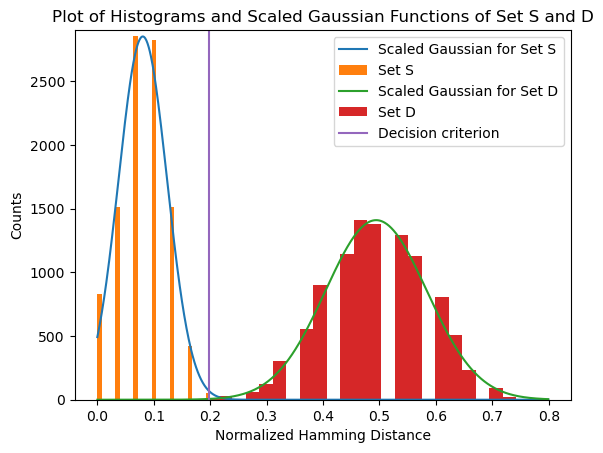

In [7]:
# Estimate the decision criterion d...

IA = 0.0005   # probability of accepting an imposter
d = norm.ppf(IA, loc=D_mean, scale=D_var**0.5)   # decision criterion
print("Estimated value of the decision criterion {:.3f}".format(d))

# Plotting the (scaled) normal distributions to the histograms of Set S & D and the decision criterion for visual inspection.

fig_2a = plt.figure()
frame_2a = fig_2a.add_subplot(1, 1, 1)

frame_2a.plot(x, ratio_S*S_gaussian, label="Scaled Gaussian for Set S")
frame_2a.hist(S, bins = 25, label="Set S")

frame_2a.plot(x, ratio_D*D_gaussian, label="Scaled Gaussian for Set D")
frame_2a.hist(D, bins = 25, label="Set D")

frame_2a.plot((d, d), (0, 3000), label='Decision criterion')

frame_2a.set_ylim(0, 2900)
frame_2a.set_xlabel('Normalized Hamming Distance')
frame_2a.set_ylabel('Counts')
frame_2a.set_title('Plot of Histograms and Scaled Gaussian Functions of Set S and D')
frame_2a.legend()

plt.show()

<span style="color:blue">  **(5 pt) (B)** </span> **For the value of the decision criterion calculated above, determine the probability of rejecting an authentic person. For this purpose, use a normal distribution to model Set S and find the value of the integral in the tail of this distribution for values HD > d. You can use the python function $scipy.stats.norm.cdf$ to compute such a probability.**

<hr>

We need to determine the probability of rejecting an authentic person using a normal distribution to model Set S and finding the value of the integral in the tail of this distribution for values HD $> d$. For this, we can use the Python function $scipy.stats.norm.cdf$ with the mean and standard deviation of the Gaussian function for Set S. Hence, the probability of rejecting an authentic person is approximately 0.003. 

In [8]:
# Determine the probability of...

p_cdf = norm.cdf(d, loc=S_mean, scale=S_var**0.5)
print("Probability of rejecting an authenic person: {:.4f}".format(1-p_cdf))

Probability of rejecting an authenic person: 0.0030


<span style="color:blue">  **(15 pt) (C)** </span> **Consider the iris code given in the file $\textit{testperson.mat}$. This file contains an iris code with some missing bits. These missing bits have the value 2 instead of 0 or 1. To which of the 20 persons whose iris codes are stored in files $person01.mat$ to $person20.mat$ does this iris code most likely belong to?**

<hr>

We need to determine to which of the 20 persons the iris code of $testperson.mat$ most likely belongs to. Since the file $testperson.mat$ contains missing bits (having a value equal to 2), the Hamming distance needs to take into account the missing data masks (denoted as $maskA$ and $maskB$) and can be written as (from Lecture 2),

$$HD = \frac{|(codeA \oplus codeB)\cap maskA \cap maskB|}{|maskA \cap maskB|}$$

where $|maskA \cap maskB|$  represents the number of bits $n$ that are good in both iris codes. We know that only the test person's iris code contains missing bits, so merely one missing data mask needs to be considered in our computations. Using a $for$ loop, we can compute the averaged normalized HD with each person in the dataset using only the non-missing bits. The minimum averaged normalized HD is equal to HDt $\approx 0.028$ and corresponds to $person5$, which is then the person to which the iris code of the test person most likely belongs to. 

In [9]:
# Loading in MATLAB data file of test person.
test_person = loadmat('./lab1-data_Irisrecognition/testperson.mat')['iriscode'].astype(np.int16)[0]

indices = np.where(test_person == 2)[0]   # list of 'bad' bits in iris code of test person

n = length_iriscode - len(indices)   # amount of non-missing bits

# This for loop computes the normalized Hamming distance between each iris code of each person in the data set and the iris
# code of the test person.

HD_vals = []   # for storing normalized Hamming distances
for i in range(0, 20):   # looping over persons
    HD_person = np.zeros(20)
    for j in range(0, 20):   # looping over rows/iris codes
        HD = np.sum([abs(data[i][j][k]-test_person[k]) for k in range(0, length_iriscode) if k not in indices])
        HD_norm = HD/n   # normalized HD
        HD_person[j] = HD_norm
    HD_vals.append(HD_person)

HD_means = [np.mean(HD_vals[i]) for i in range(0, 20)]   # averaging normalized Hamming distances w.r.t. each person

index = np.where(HD_means == np.min(HD_means))[0][0]   # finding index of minimum average norm. HD
HDt = HD_means[index]   # HD corresponding to the minimum average norm. HD
print("The minimum averaged normalized HD is given by: {:.4f} (corresponding to list index of {})".format(HDt, index))
print("Hence, the iris code of the test person most likely belongs to: person {}".format(index+1))

The minimum averaged normalized HD is given by: 0.0275 (corresponding to list index of 4)
Hence, the iris code of the test person most likely belongs to: person 5


<span style="color:blue"> **(5 pt) (D)** </span> **What is the significance level of your decision? $Hint:$ Excluding the bits with a value of 2, denote by HDt the normalized Hamming distance between the iris code of the test person and the iris code of the person that you identified in the data set. The significance level which corresponds to HDt is defined as the probability that the comparison of the iris code of the test person with the iris code of a different person will result in a HD such that HD ≤ HDt, i.e., the concerned significance level is equal to the integral of the tail of the distribution for HD ≤ HDt. To compute its value, make use of the theoretical expression for the parameters of the normal distribution of the normalized iris code HD for the given number of available (i.e., non-missing) bits.**


<hr>

We need to compute the significance level of our decision. As stated in the hint, the significance level is equal to the integral of the tail of the distribution for HD $\leq$ HDt where HDt is the (averaged) normalized Hamming distance computed in the previous question. Hence, we need to recompute the distributions of Set S and D for the non-missing bits in the iris code of the test person. Then, we can compute the significance level with the Python function $scipy.stats.norm.cdf$ using HDt, the mean of the new Set D and its standard deviation as the input parameters. Thus, the significance level of our decision is approximately $4.3 \cdot 10^{-5}$. If we consider the maximum normalized Hamming distance between $testperson$ and $person5$'s iris codes then the significance level would increase to approximately 0.01 which is about $2.3 \cdot 10^2$ times larger than our previous result, but remains relatively small.  

For visual inspection, we have also plotted the histograms and scaled Gaussian functions of the new Set S and D. We can observe that their distributions have moved closer together in comparison to the plot presented in Question (C) of Part 1.

In [10]:
"""In this cell, we are recomputing the distributions and Gaussian functions of Set S and D from Part 1 such that 
we are only considering the non-missing bits in the iris codes of the persons, given the iris code of the test person. """

np.random.seed(42)   # fixing the random seed s.t. our results can be reproduced

# This while loop chooses randomly one person & randomly two iris codes (rows) 
# from that person and computes the normalized HD of the iris codes from these two rows.
# This process is repeated for 10,000 iterations. In this case, we are only considering the 'good' bits of the test person.

S_nm = []   # for storing the normalized HD values when only considering non-missing bits; Set S
t = 0   # initializing 't' for the while loop

while t < end:
    choice_person = np.random.randint(0, 20)   # choosing a random person
    choice_row1 = np.random.randint(0, 20)   # choosing random row 1 / iris code 1
    choice_row2= np.random.randint(0, 20)   # choosing random row 2 / iris code 2
    
    HD = np.sum([abs(data[choice_person][choice_row1][k] - data[choice_person][choice_row2][k]) for k in range(0, length_iriscode) if k not in indices])   # Hamming distance
    HD_norm = HD/length_iriscode   # normalized Hamming distance
    
    S_nm.append(HD_norm)
    
    t += 1
    
# This while loop chooses randomly two persons & randomly two iris codes (rows) from those persons 
# and computes the normalized HD of the iris codes from these two rows. This process is repeated for 10.000 iterations.

D_nm = []   # for storing the normalized HD values when only considering non-missing bits; Set D
t = 0   # initializing 't' for the while loop

while t < end:
    choice_person1 = np.random.randint(0, 20)   # randomly choosing person 1
    choice_row1 = np.random.randint(0, 20)   # randomly choosing a row/iris code from person 1
    # Note that the same person should not be picked when randomly choosing person 2, so there is one less option.
    choice_person2 = np.random.choice([i for i in range(0, 20) if i != choice_person1])   # randomly choosing person 1
    choice_row2= np.random.randint(0, 20)   # randomly choosing a row/iris code from person 2
    
    HD = np.sum([abs(data[choice_person1][choice_row1][k] - data[choice_person2][choice_row2][k]) for k in range(0, length_iriscode) if k not in indices])   # Hamming distance
    HD_norm = HD/length_iriscode   # normalized Hamming distance
    
    D_nm.append(HD_norm)
    
    t += 1

# Computing scaled Gaussian functions for Set S and Set D.

Snm_gaussian = gaussian(x, np.mean(S_nm), np.var(S_nm))   # Gaussian for Set S
hS, bS = np.histogram(S_nm, bins=25)   # returns the counts and bin edges of the histogram for Set S
ratio_Snm = np.max(hS)/np.max(Snm_gaussian)   # scaling factor for the normal distribution s.t. histogram is fitted well

Dnm_mean = np.mean(D_nm)   # mean of Set D
Dnm_var = np.var(D_nm)   # variance of Set D
Dnm_gaussian = gaussian(x, Dnm_mean, Dnm_var)   # Gaussian for Set D
hD_nm, bD_nm = np.histogram(D_nm, bins=25)   # returns the counts and bin edges of the histogram for Set S
ratio_Dnm = np.max(hD_nm)/np.max(Dnm_gaussian)   # scaling factor for the normal distribution s.t. histogram is fitted well

Significance level of our decision when considering averaged normalized HD: 4.306e-05
Significance level when considering maximum normalized HD between test person and person 5: 0.010


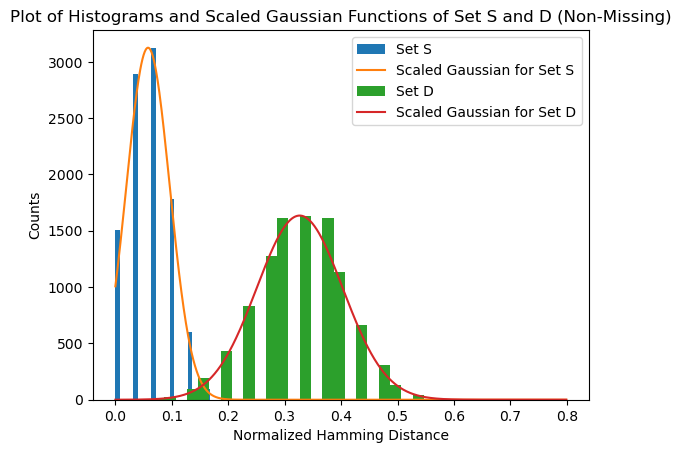

In [11]:
"""In this cell, we are computing the significance level(s) of our decision and plotting the histograms and Gaussian 
functions of Set S & D for visual inspection. """

sign_level = norm.cdf(HDt, loc=Dnm_mean, scale=Dnm_var**0.5)   # significance level 
print("Significance level of our decision when considering averaged normalized HD: {:.3e}".format(sign_level))
print("Significance level when considering maximum normalized HD between test person and person {}: {:.3f}"
      .format(index+1, norm.cdf(np.max(HD_vals[index]), loc=Dnm_mean, scale=Dnm_var**0.5)))

# Plot histograms and scaled Gaussian functions of new Set S and D for visual inspection.

fig_2d = plt.figure()
frame_2d = fig_2d.add_subplot(1, 1, 1)

frame_2d.hist(S_nm, bins = 25, label="Set S")   # plotting Set S (non-missing bits)
frame_2d.plot(x, ratio_Snm*Snm_gaussian, label="Scaled Gaussian for Set S") # plotting scaled Gaussian for Set S

frame_2d.hist(D_nm, bins = 25, label="Set D")   # plotting Set D (non-missing bits)
frame_2d.plot(x, ratio_Dnm*Dnm_gaussian, label="Scaled Gaussian for Set D") # plotting scaled Gaussian for Set D

frame_2d.set_xlabel('Normalized Hamming Distance')
frame_2d.set_ylabel('Counts')
frame_2d.set_title('Plot of Histograms and Scaled Gaussian Functions of Set S and D (Non-Missing)')   # setting title
frame_2d.legend() 

plt.show()

<hr>

# <span style="color:blue">Exercise 2 - Image matching using SIFT (50pt)  <a class="anchor" id="chapter2"></a></span>

You are given two images named $a.jpg$ and $b.jpg$ that contain the same scene taken from different views. Use SIFT algorithm to identify key points in both the images and perform image matching based on the obtained descriptors.

<span style="color:blue"> **(10 pt) (A)** </span> **Describe briefly how the SIFT and SURF algorithms work.**

<hr>

As described in Lecture 3, the SIFT algorithm subtracts a set of keypoints from a picture which are next to orientation invariant also scale invariant.

The algorithm starts by calculating the second derivative from the image. A Laplacian of Gaussian function is applied to the picture which is a second order derivative filter. The filter is applied using multiple values of $\sigma$, the standard deviation. The multiple values of $\sigma$ are calculated by multiplying it with a constant $k^i$ where $i$ is the iteration of which the filter is applied. With all the resulting images the difference is calculated between every successor Laplacian of Gaussian result. 

$G(k^i\sigma)$ - $G(k^{i+1}\sigma)$ = Difference of Gaussian

Then the octave of the input image is calculated which is a downsized version of the image by a scale of 2. Then the same set  difference of Gaussians are calculated. 

From these sets 3x3x3 grids are taken and the maximum and minimum are calculated which correspond to the keypoints of the input image. 

For every keypoint the location is stored. The scale is stored, which is the $\sigma$ used for the Gaussian. Then a histogram is made of local gradients values and the most dominant direction is chosen as the keypoint orientation and magnitude.

So every keypoint consists of a description that is the location, scale, magnitude and orientation. This is used for keypoint matching between different images using the Euclidean distance between descriptions.

The SURF algorithm also subtracts keypoints from an image for matching. This algorithm is faster and claimed to be more robust (Lecture 3). Instead of using Laplacian Gaussian filter, it uses a square wave filter as an approximation for the second order derivative. The filter is applied to the intergral image, where each value in the image is all the values to the left and top inclusive summed up from the input image. This makes the computations for box-type (square wave) convolution filters faster. 

As a result of using box filters and intergral images we don't need to apply the Laplace filter iteratively to the output of the last filter like in SIFT, but we can immediately apply it to the input image and even perform the task in parallel. Instead of iteratively downscaling the input image by a factor 2, the box filter is scaled up by factor 2.  

Determinant of the Hessian matrix is used for selecting the location and scale of the feature. 

The size of the description is 64 instead of 128 dimensions, which decreases computation times for matching features. 

These changes from the SIFT algorithm cause it be be executed faster. It is said to be more robust to variations of a feature, though this also causes to match more false positives.

<span style="color:blue"> **(10 pt) (B)** </span>  **Display the two images and the corresponding key points identified by SIFT detector. You can use the built-in functions from $opencv$ to get and display the key points.**

<hr>

We need to display the two images and the corresponding keypoints identified by SIFT detector using the built-in functions from $opencv$ to get and display the keypoints. For this, we have mostly followed the Python tutorial $\textit{Introduction to SIFT (Scale-Invariant Feature Transform)}$ [1]. 

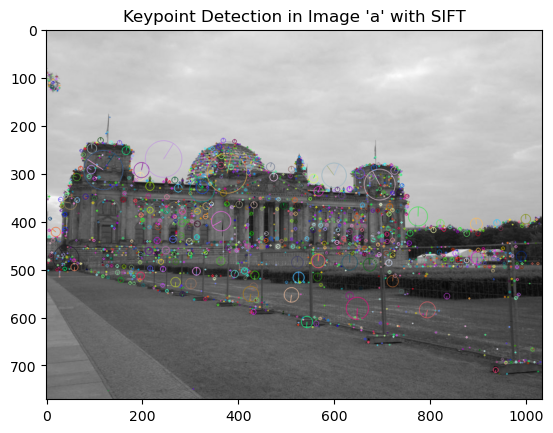

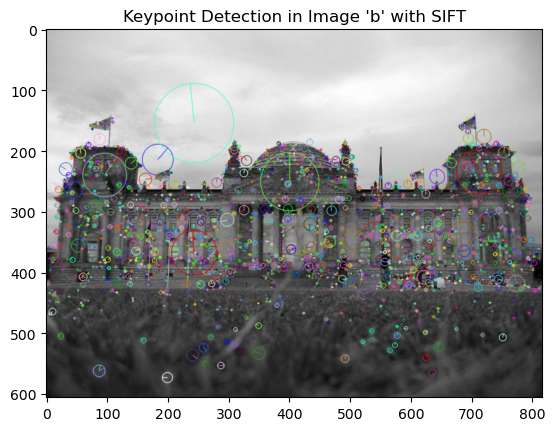

In [12]:
"""In this cell, we display the two images 'a' and 'b' and the corresponding key points identified by SIFT detector using
the built-in functions from opencv. """

img_a = cv.imread('a.jpg')   # loading image 'a'
img_b = cv.imread('b.jpg')   # loading image 'b'
# Converting the images to grayscale for better visual contrast with drawn keypoints.
gray_a = cv.cvtColor(img_a, cv.COLOR_BGR2GRAY)
gray_b = cv.cvtColor(img_b, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()   # creating SIFT object
kp_a = sift.detect(img_a, None)   # finding keypoints in image 'a'
kp_b = sift.detect(img_b, None)   # finding keypoints in image 'b'

# Drawing keypoints in the images. Using flag 'DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS' to draw circles that are 
# representative of the keypoints' size and include their orientation.
img_a = cv.drawKeypoints(gray_a, kp_a, img_a, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints_imga.jpg', img_a)   # saving the result for image 'a'
img_b = cv.drawKeypoints(gray_b, kp_b, img_b, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints_imgb.jpg', img_b)   # saving the result for image 'b'

# Plotting the images and their corresponding keypoints identified by SIFT.
fig_imga = plt.figure()
frame_imga = fig_imga.add_subplot(1, 1, 1)
frame_imga.imshow(img_a)
frame_imga.set_title("Keypoint Detection in Image 'a' with SIFT")

fig_imgb = plt.figure()
frame_imgb = fig_imgb.add_subplot(1, 1, 1)
frame_imgb.imshow(img_b)
frame_imgb.set_title("Keypoint Detection in Image 'b' with SIFT")

plt.show()

<span style="color:blue"> **(30 pt) (C)** </span> **Match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images. You can use the built-in functions from $opencv$ to get and display the results for image matching.**

<hr>

We need to match the obtained descriptors in the two images and display the results that draw lines between the matched descriptors from the two images, using the built-in functions from $opencv$ to get and display the results for image matching. As mentioned in Lecture 3, we can use the Brute-Force matcher for this purpose. Hence, we have mainly followed the Python tutorial $\textit{Feature Matching}$ for this question [3]. In the cell below, we have determined the best and second best (if applicable) matches per image descriptor (i.e. the closest neighbours) and applied the ratio test described in [3]. We can observe some outliers in the matched descriptors, e.g., a pole in the gate surrounding the building in image 'a' being matched to the lower section of the building's dome in image 'b'. 

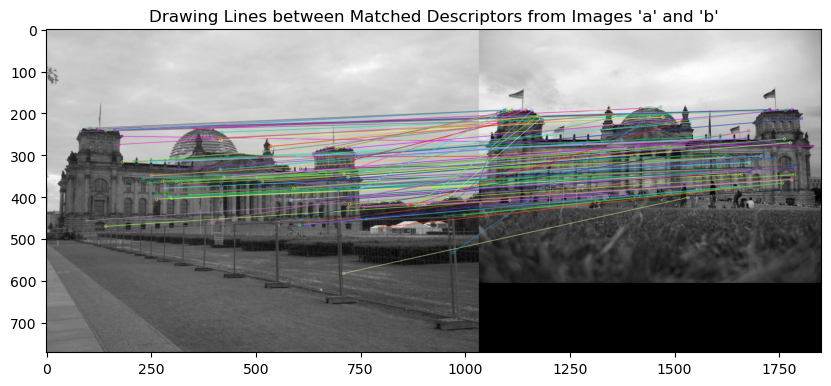

In [13]:
"""In this cell, we display the results that draw lines between the matched descriptors from the two images using the 
built-in functions from opencv. """

# Computing descriptors from keypoints found in images 'a' and 'b' with SIFT
kp_a, des_a = sift.compute(gray_a, kp_a)
kp_b, des_b = sift.compute(gray_b, kp_b)

bf = cv.BFMatcher()   # creating Brute-Force matcher object
matches = bf.knnMatch(des_a, des_b, k=2)   # determines k <= 2 best matches per image descriptor

# Apply ratio test from [3] by looping over the matched descriptors. 
good = []   # for storing the 'good' matches
ratio = 0.75 
for m, n in matches:
    # If the distance between the best and 2nd best matches are sufficiently different, i.e. the distance of the best match
    # is smaller than ratio*(distance of 2nd best match), then the keypoint is considered 'good'.
    if m.distance < ratio*n.distance:
        good.append([m])
    
# Drawing lines between the matched descriptors by parsing the flag 'cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS'.
# Note that the flags 'DEFAULT' and 'DRAW_RICH_KEYPOINTS' would also plot the unmatched keypoints between the images.
result = cv.drawMatchesKnn(gray_a, kp_a, gray_b, kp_b, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plotting the results that draw lines between the matched descriptors from images 'a' and 'b'.
fig_c = plt.figure(figsize=[10, 10])
plt.imshow(result)
plt.title("Drawing Lines between Matched Descriptors from Images 'a' and 'b'")
plt.show()

# <span style="color:blue">Contributions<a class="anchor" id="chapter3"></a></span>

For this project, we have worked through most of the questions in tandem during the tutorial on November 23, 2022, in order to obtain well-rounded solutions overall. However, it should be noted that the solution to Question (D) of Part 2 in Exercise 1 was mainly written by Ilse and Question (A) in Exercise 2 by Tom.

# <span style="color:blue">References<a class="anchor" id="chapter3"></a></span>

[1] OpenCV: Introduction to SIFT (Scale-Invariant Feature Transform). (n.d.). Retrieved December 2, 2022, from https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

[2] OpenCV: Feature Matching. (n.d.). Retrieved December 2, 2022, from https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

[3] Lowe, D. G. (2004). Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision, 60(2), 91–110. https://doi.org/10.1023/b:visi.0000029664.99615.94 [Online; Accessed December 2, 2022]


